<a href="https://colab.research.google.com/github/Sarath247662/Basis-of-Learning/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>exploring the dataset<h1>

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)#as_frame because fetch_openML is giving back pandas dataframe.
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
x,y = mnist["data"], mnist["target"]

In [3]:
print(x.shape, y.shape)

(70000, 784) (70000,)


In [4]:
import numpy as np
y = y.astype(np.uint8)

In [5]:
type(x)

numpy.ndarray

In [6]:
x[1]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

0


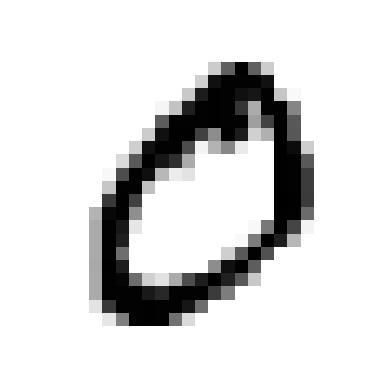

In [7]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
def num_img(a):
    plt.imshow(x[a].reshape(28,28),cmap=mpl.cm.binary)
    plt.axis("off")
    print(y[a])

num_img(1)


<h1>using sgd to build a 0, non 0 classifier<h1>

In [8]:
x_train,x_test,y_train,y_test = x[:60000],x[60000:],y[:60000],y[60000:]

In [9]:
y_train_0 = (y_train==0)
Y_test_0= (y_test==0)


In [10]:
from sklearn.linear_model import SGDClassifier
classf = SGDClassifier(random_state = 69)
classf.fit(x_train,y_train_0)

SGDClassifier(random_state=69)

In [11]:
classf.predict([x[1]])

array([ True])

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(classf,x_train,y_train_0,cv=3,scoring = "accuracy")

array([0.9865 , 0.98725, 0.98745])

In [13]:
from sklearn.model_selection import cross_val_predict
y_train_0_predict = cross_val_predict(classf,x_train,y_train_0,cv = 3)

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_0,y_train_0_predict)

array([[53781,   296],
       [  480,  5443]])

In [15]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_0,y_train_0_predict))
print(recall_score(y_train_0,y_train_0_predict))

0.9484230702212929
0.9189599864933311


<h1> using a simple neural network to train the entire dataset<h1>

In [16]:
import tensorflow as tf

In [17]:
mnist = tf.keras.datasets.mnist ##dunno what but using mnist fetched from openml was just not showing regularization result altho it was happening
(x_train, y_train),(x_test, y_test) = mnist.load_data() ##overall openml is just shit, first givin out pandas dataframe now this

In [18]:
type(x_train)

numpy.ndarray

In [19]:
x_train  = tf.keras.utils.normalize(x_train)
x_test  = tf.keras.utils.normalize(x_test)

In [20]:
x_train[0].reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

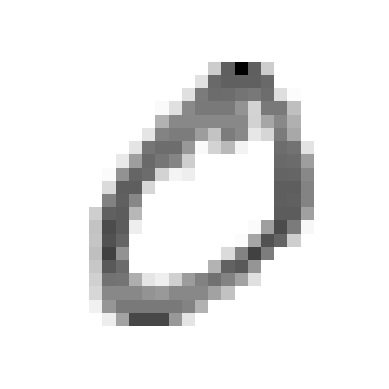

In [21]:
plt.imshow(x_train[1].reshape(28,28),cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

In [22]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2666 - accuracy: 0.9198
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1104 - accuracy: 0.9666
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0766 - accuracy: 0.9761
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0576 - accuracy: 0.9811
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0449 - accuracy: 0.9854
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0367 - accuracy: 0.9878
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0300 - accuracy: 0.9904
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0246 - accuracy: 0.9919
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0206 - accuracy: 0.9934
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0

In [25]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1108 - accuracy: 0.9760
0.11082950234413147
0.9760000109672546
